In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
wisc_df = pd.read_csv('wisc_bc_data.csv')

In [3]:
wisc_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


# Finding the shape of dataset 

In [4]:
wisc_df.shape

(569, 32)

The data has 569 rows and 32 columns

# finding nan values in each columns

In [5]:
wisc_df.isnull().sum()

id                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

There are no empty values in this dataset

## To find the data types in this dataset 

In [6]:
wisc_df.dtypes

id                     int64
diagnosis             object
radius_mean          float64
texture_mean         float64
perimeter_mean       float64
area_mean            float64
smoothness_mean      float64
compactness_mean     float64
concavity_mean       float64
points_mean          float64
symmetry_mean        float64
dimension_mean       float64
radius_se            float64
texture_se           float64
perimeter_se         float64
area_se              float64
smoothness_se        float64
compactness_se       float64
concavity_se         float64
points_se            float64
symmetry_se          float64
dimension_se         float64
radius_worst         float64
texture_worst        float64
perimeter_worst      float64
area_worst           float64
smoothness_worst     float64
compactness_worst    float64
concavity_worst      float64
points_worst         float64
symmetry_worst       float64
dimension_worst      float64
dtype: object

The datatypes of each column seems that encoding is to be done only for lable while all the other columns are donot require to be encoded since all of them are non-null integer values

In [7]:
# let us check the values inn thte diagnosis column

wisc_df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

This means that we have two values in our label and thus we need to apply label encoding in this

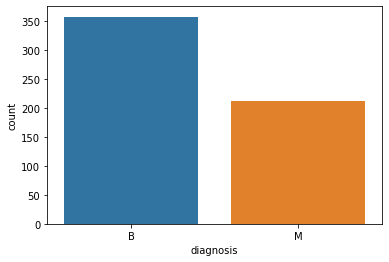

In [8]:
# visulalising the count of the cancer cells

sns.countplot(x= 'diagnosis', data = wisc_df)
plt.show()

## Exploratory Data Analysis

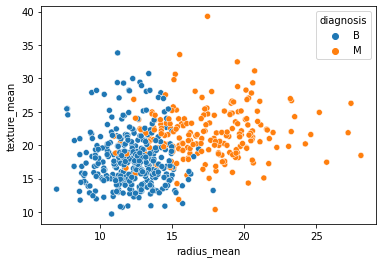

In [9]:
sns.scatterplot(x = 'radius_mean', y = 'texture_mean', data = wisc_df, hue="diagnosis")
plt.show()

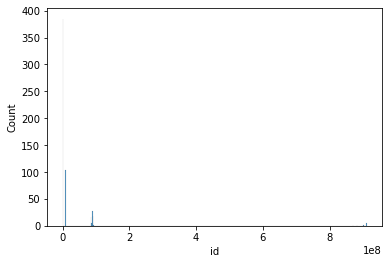

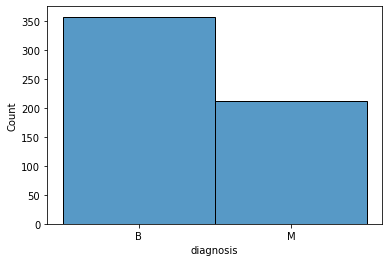

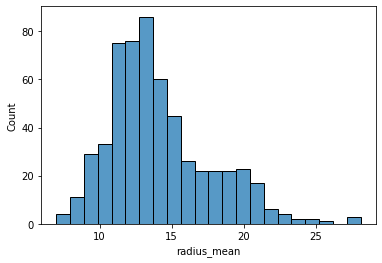

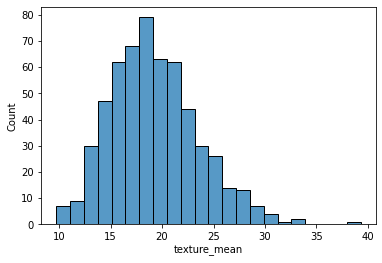

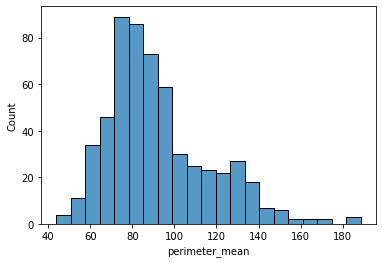

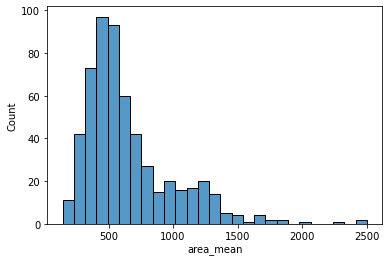

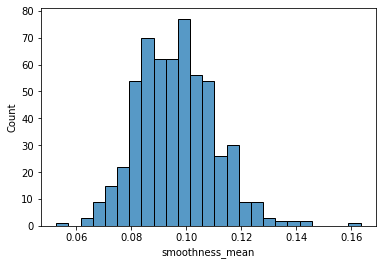

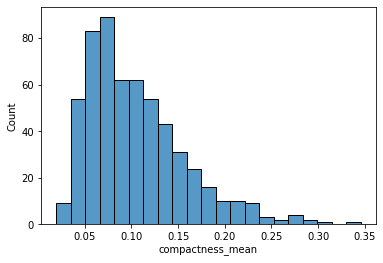

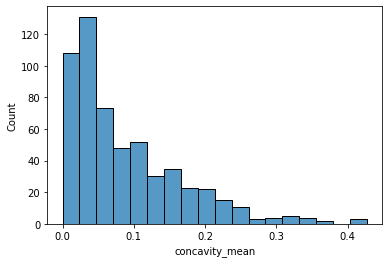

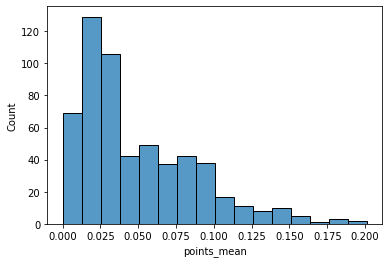

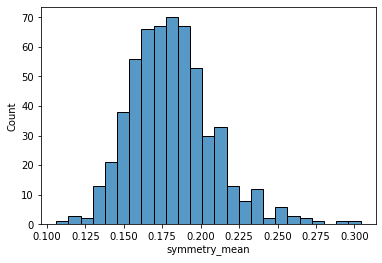

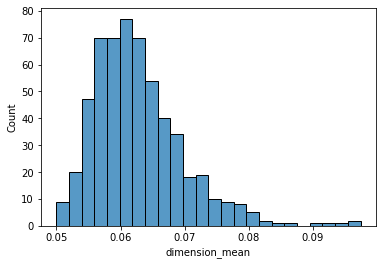

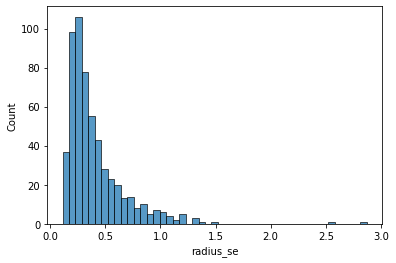

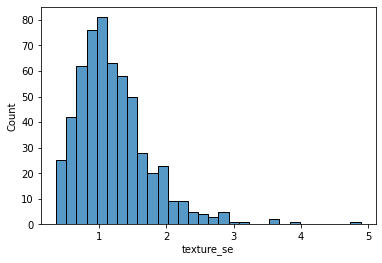

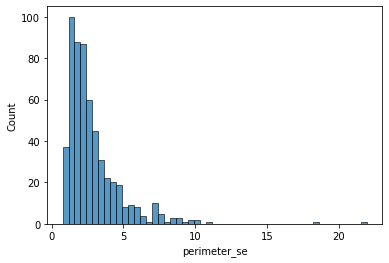

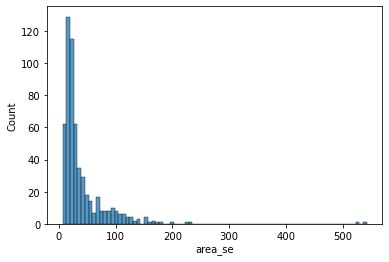

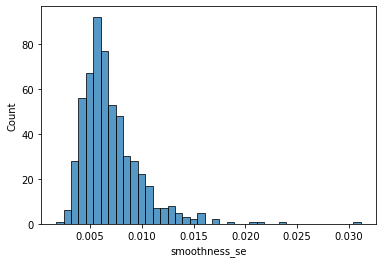

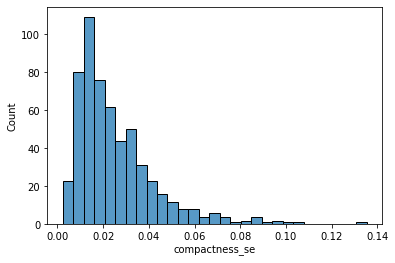

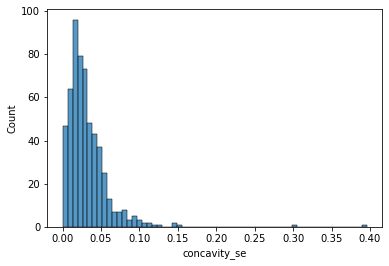

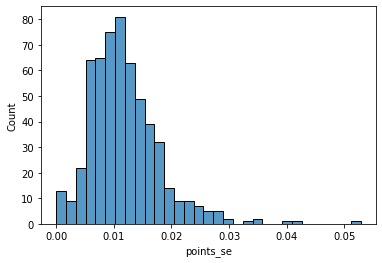

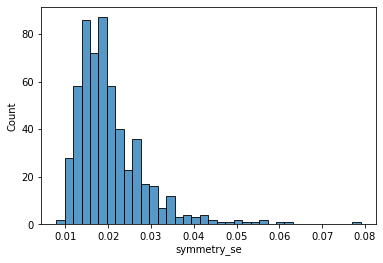

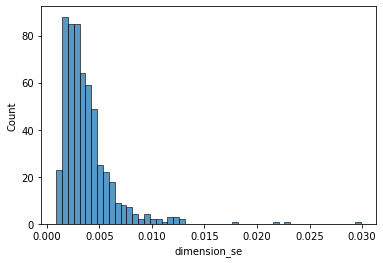

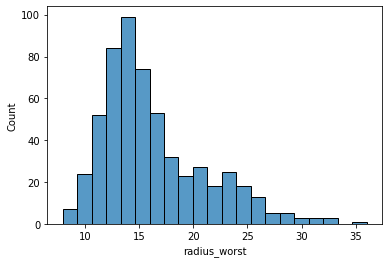

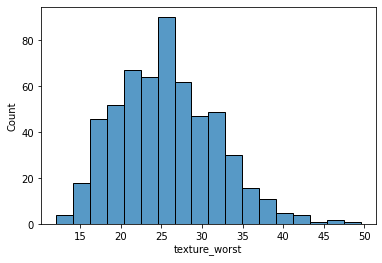

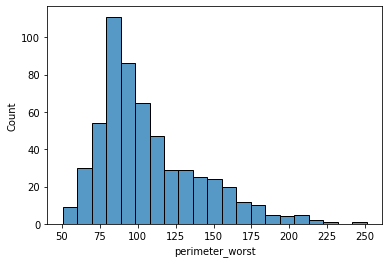

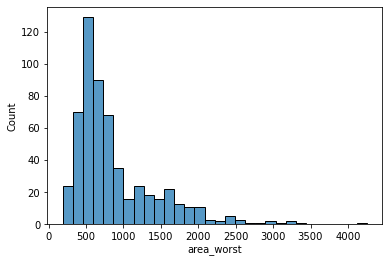

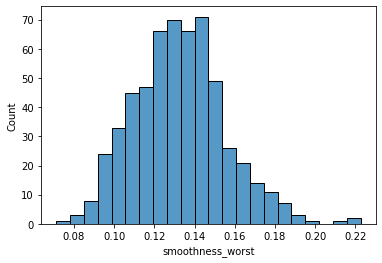

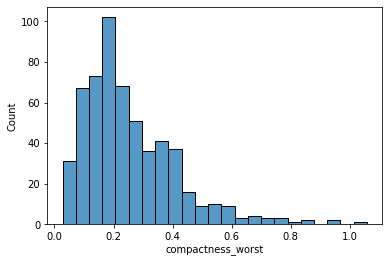

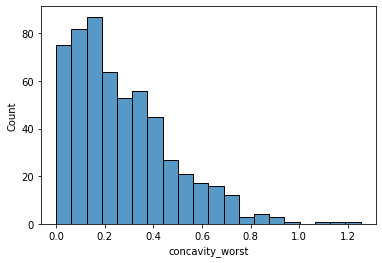

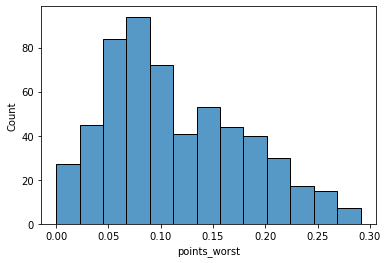

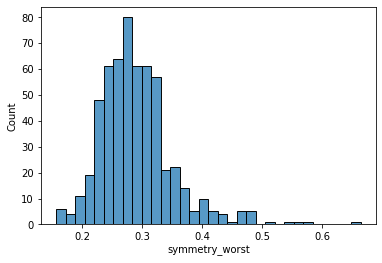

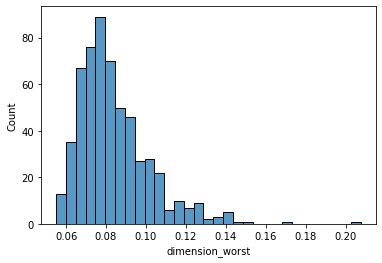

In [10]:
for feature in wisc_df.columns:
    data = wisc_df.copy()
    sns.histplot(data[feature])
    plt.show()

In [11]:
from sklearn.model_selection import train_test_split

X = wisc_df.drop(['diagnosis','id'], axis = 1)
y = wisc_df["diagnosis"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y_train)

LabelEncoder()

In [14]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [15]:
y_train

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,

In [16]:
y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)

In [17]:
y_train_df

,0
0,0
1,0
2,1
3,1
4,0
...,...
393,0
394,0
395,0
396,0


# Let's us Scale Our Data 

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [19]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns= X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns= X_train.columns)

In [21]:
np.round(X_train_scaled.describe(),2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,398.00,398.00,398.00,398.00,398.00,398.00,398.00,398.00,398.00,398.00,...,398.00,398.00,398.00,398.00,398.00,398.00,398.00,398.00,398.00,398.00
mean,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,...,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.08,-2.04,-2.03,-1.50,-3.06,-1.61,-1.11,-1.28,-2.71,-1.79,...,-1.76,-2.13,-1.71,-1.24,-2.27,-1.40,-1.29,-1.78,-2.10,-1.57
25%,-0.68,-0.70,-0.67,-0.66,-0.71,-0.73,-0.73,-0.73,-0.70,-0.66,...,-0.66,-0.70,-0.67,-0.63,-0.68,-0.67,-0.72,-0.76,-0.65,-0.66
50%,-0.18,-0.11,-0.19,-0.26,-0.01,-0.19,-0.34,-0.40,-0.05,-0.22,...,-0.24,-0.07,-0.25,-0.31,-0.03,-0.28,-0.22,-0.25,-0.15,-0.25
75%,0.48,0.59,0.50,0.34,0.62,0.44,0.50,0.61,0.51,0.48,...,0.41,0.62,0.50,0.25,0.53,0.51,0.48,0.72,0.42,0.41
max,3.92,4.63,4.04,5.51,4.55,4.40,4.12,3.95,3.95,4.65,...,4.24,3.87,4.39,6.14,3.85,4.94,4.55,2.70,5.82,6.48


therefore data is scaled

## to find models with correct prediction 

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
def models(a, b):
    # Logistic Regression
    from sklearn.linear_model import LogisticRegression
    lr = LogisticRegression()
    lr.fit(a, b)
    
    #DecisionTree Classifier
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier()
    tree.fit(a, b)
    
    #RandomForest Classifier
    from sklearn.ensemble import RandomForestClassifier
    rn_forest = RandomForestClassifier(n_estimators = 1000, max_features = 0.25)
    rn_forest.fit(a, b)
    
    #Support Vector Classifier
    from sklearn.svm import SVC
    clf = SVC()
    clf.fit(a, b)
    
    #XGB Classifier
    from xgboost import XGBClassifier
    xg_clf = XGBClassifier()
    xg_clf.fit(a, b)
    
    print("[0]Logistic Regression Accuracy:", lr.score(a, b))
    print("[1]Decision Tree Accuracy:", tree.score(a, b))
    print("[2]Random Forest Accuracy:", rn_forest.score(a, b))
    print("[3]SVM accuracy :", clf.score(a, b))
    print("[4]XGboost accuracy :", xg_clf.score(a, b))
    
    
    
    return lr , tree,rn_forest, clf , xg_clf

In [24]:
model = models(X_train_scaled, y_train_df)

C:\Users\91815\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
<ipython-input-23-50930c649bdf>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rn_forest.fit(a, b)
C:\Users\91815\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\91815\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when const

[20:48:34] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]Logistic Regression Accuracy: 0.9874371859296482
[1]Decision Tree Accuracy: 1.0
[2]Random Forest Accuracy: 1.0
[3]SVM accuracy : 0.9849246231155779
[4]XGboost accuracy : 1.0


# Now Let's get Data for all the models

In [25]:
from sklearn.metrics import classification_report 

print(classification_report(y_test_df, model[0].predict(X_test_scaled)))
print("Logistic Regression:", accuracy_score(y_test_df, model[0].predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       110
           1       0.98      0.98      0.98        61

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171

Logistic Regression: 0.9883040935672515


In [26]:
print(classification_report(y_test_df, model[1].predict(X_test_scaled)))
print("Decision Tree Classifier:", accuracy_score(y_test_df, model[1].predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       110
           1       0.90      0.92      0.91        61

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

Decision Tree Classifier: 0.935672514619883


In [27]:
print(classification_report(y_test_df, model[2].predict(X_test_scaled)))
print("Random Forest Classifier:",accuracy_score(y_test_df, model[2].predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       110
           1       0.94      0.97      0.95        61

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171

Random Forest Classifier: 0.9649122807017544


In [28]:
print(classification_report(y_test_df, model[3].predict(X_test_scaled)))
print("Support Vector Machine",accuracy_score( y_test_df, model[3].predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       110
           1       0.98      0.98      0.98        61

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171

Support Vector Machine 0.9883040935672515


In [29]:
print(classification_report(y_test_df, model[4].predict(X_test_scaled)))
print('XGBoost Classifier:', accuracy_score( y_test_df, model[4].predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       110
           1       0.95      0.98      0.97        61

    accuracy                           0.98       171
   macro avg       0.97      0.98      0.97       171
weighted avg       0.98      0.98      0.98       171

XGBoost Classifier: 0.9766081871345029


The accuracy achieved is more than 90% on both the train and the test data. Out of all these models the best one which works best with train and test data s

In [32]:
pred = model[4].predict(X_test_scaled)

In [33]:
print(pred)
print()
print(y_test)

[0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0
 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0
 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0]

[0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0
 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 1 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0
 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0]
